In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import time
import os

api = KaggleApi()
api.authenticate()

competition = "feedback-prize-english-language-learning"

leaderboard = api.competition_leaderboard_download(competition, ".")
# unzip
import zipfile
with zipfile.ZipFile(competition + ".zip", "r") as zip_ref:
    zip_ref.extractall(".")

today_file_name = time.strftime("%Y-%m-%d") + ".csv"
os.rename(competition + "-publicleaderboard.csv", today_file_name)

In [141]:
import pandas as pd

today = pd.read_csv(today_file_name)
yesterday_file_name = time.strftime("%Y-%m-%d", time.localtime(time.time() - 86400)) + ".csv"
yesterday = pd.read_csv(yesterday_file_name)

# count every value on every score
today = today["Score"].value_counts()
yesterday = yesterday["Score"].value_counts()
# to Dataframe
today = pd.DataFrame(today).reset_index()
yesterday = pd.DataFrame(yesterday).reset_index()

today.insert(0, "date", "today")
yesterday.insert(0, "date", "yesterday")
# concat
df = pd.concat([today, yesterday], ignore_index=True)

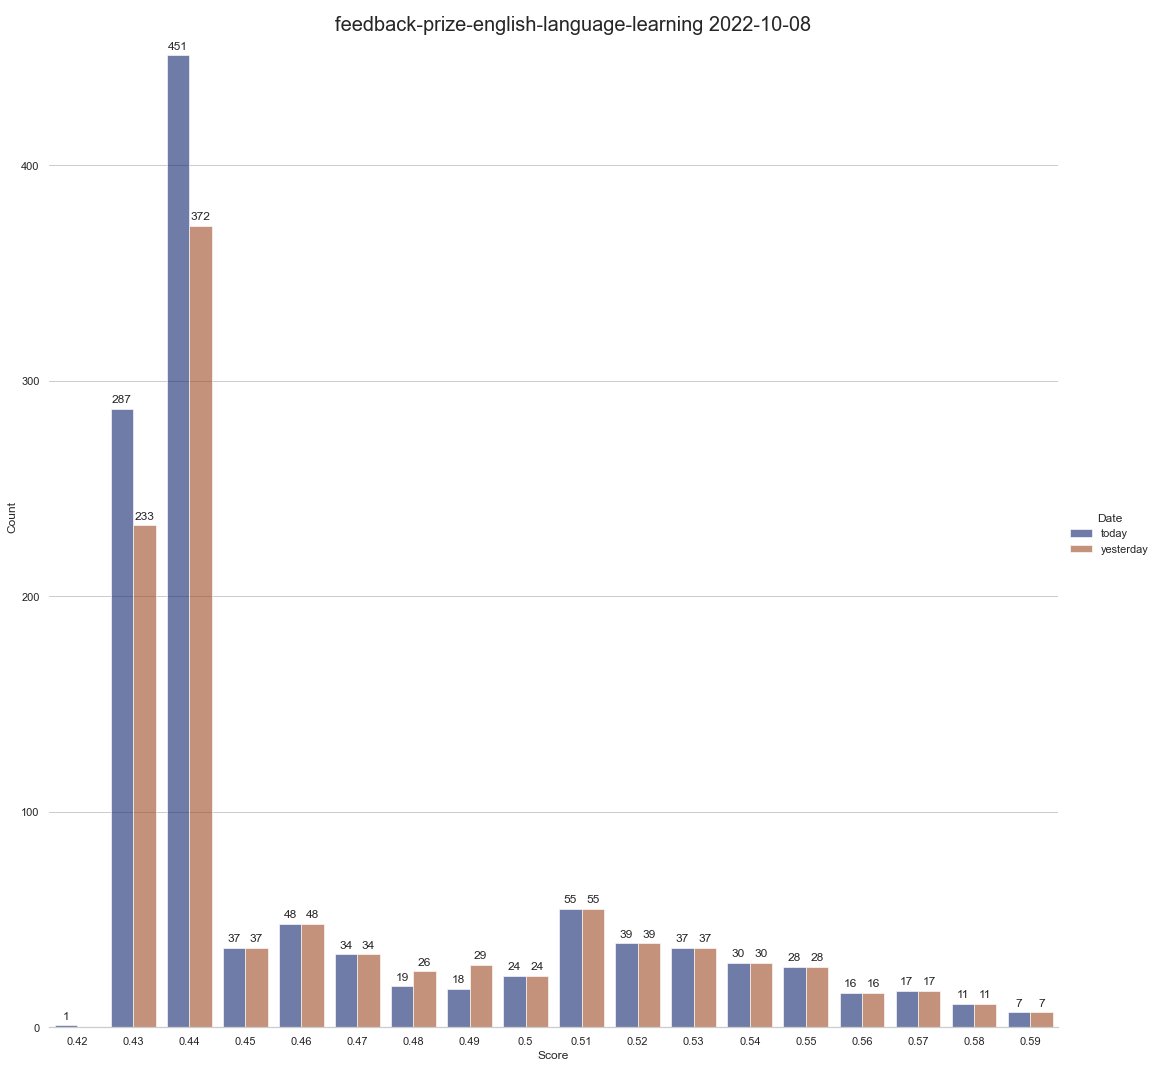

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

g = sns.catplot(
    data=df[df["index"] < 0.6], kind="bar",
    x="index", y="Score", hue="date",
    ci="sd", palette="dark", alpha=.6, height=15
)


for p in g.ax.patches:
    g.ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'center',
        xytext = (0, 9), textcoords = 'offset points'
    )

g.despine(left=True)
g.set_axis_labels("Score", "Count")
g.legend.set_title("Date")
title = competition + " " + time.strftime("%Y-%m-%d")
g.fig.suptitle(title, fontsize=20)
plt.savefig(title + ".png")